# Visualizing Time Series Data: The Foundation of Analysis

## Learning Objectives
By the end of this notebook, you will be able to:
1. Understand why visualization is critical before building models
2. Create effective time series plots with proper formatting
3. Identify trends and seasonality through visual inspection
4. Use zooming and multiple views to see different patterns
5. Compare multiple time series on the same plot


## Introduction: Why Visualization Matters First

**Visualization is the foundation of time series analysis.** Before we build any forecasting models, we must see what our data looks like. A well-designed plot can reveal patterns, trends, and anomalies that numbers alone cannot show.

**Think of it this way:** Would you rather:
- Look at 144 numbers in a spreadsheet? ❌
- See one graph that tells the whole story? ✅

**The graph wins every time.**

### Why Visualization is Critical

1. **See the Big Picture:** One glance shows the overall pattern
2. **Identify Trends:** Is data going up, down, or staying flat?
3. **Spot Seasonality:** Are there repeating patterns?
4. **Detect Anomalies:** Unusual spikes or drops stand out
5. **Guide Model Choice:** What you see helps you choose the right forecasting method
6. **Communicate Findings:** Stakeholders understand graphs better than numbers

**Real-World Example:** A retail manager looking at monthly sales numbers might miss that December always spikes. But a simple line plot makes this obvious instantly!

**Think About It:** Can you think of a time when a graph revealed something that numbers alone didn't show?


## Section 1: Basic Time Series Plotting

Let's start with the fundamentals of creating effective time series plots.


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style for professional-looking graphs
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully")
print("Ready to create beautiful time series visualizations")


Libraries imported successfully
Ready to create beautiful time series visualizations


In [9]:
# Load and prepare the data
data = pd.read_csv('AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

print("✅ Data loaded successfully")
print(f"Date range: {data.index.min()} to {data.index.max()}")
print(f"Total months: {len(data)}")


✅ Data loaded successfully
Date range: 1949-01-01 00:00:00 to 1960-12-01 00:00:00
Total months: 144


### Creating a Professional Time Series Plot

A good time series plot should:
- Be easy to read
- Show clear patterns
- Have proper labels and titles
- Use appropriate colors
- Include grid lines for easier reading


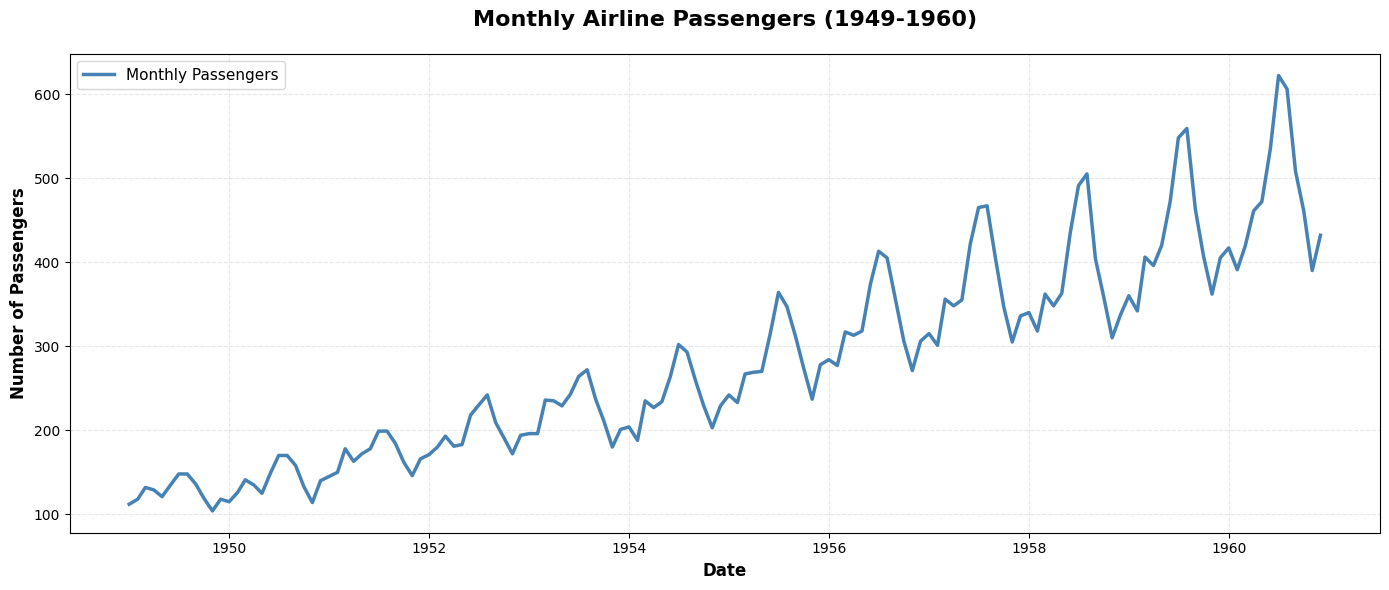


🔍 What patterns do you see?
1. Is there a general trend? (Upward, downward, or flat)
2. Do you see repeating patterns? (Seasonality)
3. Are there any unusual spikes or drops? (Anomalies)


In [10]:
# Create a professional time series plot
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['#Passengers'], 
         linewidth=2.5, color='steelblue', label='Monthly Passengers')
plt.title('Monthly Airline Passengers (1949-1960)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Number of Passengers', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print("\n🔍 What patterns do you see?")
print("1. Is there a general trend? (Upward, downward, or flat)")
print("2. Do you see repeating patterns? (Seasonality)")
print("3. Are there any unusual spikes or drops? (Anomalies)")


## Section 2: Identifying Trends Visually

Trends are easier to see when you know what to look for. Let's explore different ways to visualize trends.


### Method 1: Adding a Trend Line

One way to see the trend clearly is to add a smooth line that shows the overall direction.


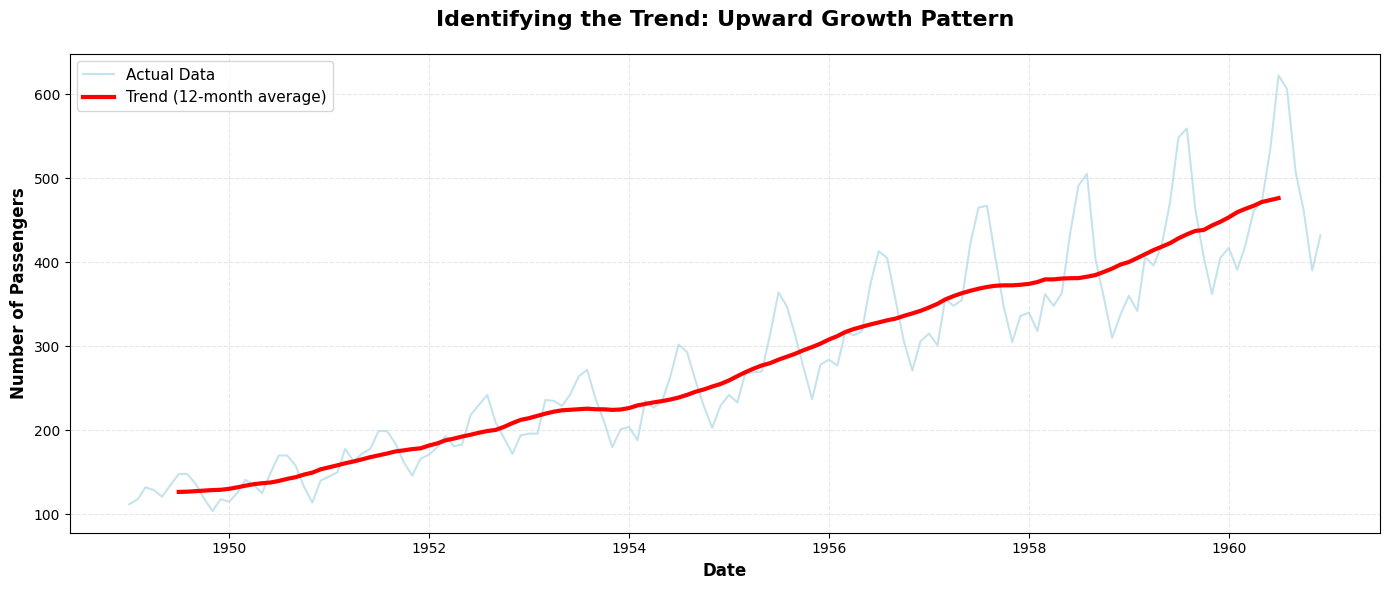


📊 Key Observation:
The red trend line clearly shows an upward direction
This tells us the airline is growing over time.

💡 Business Insight:
Even though there are ups and downs (seasonality),
the overall business is growing steadily.


In [11]:
# Create a plot with a trend line
# We'll use a simple moving average to show the trend

# Calculate a 12-month moving average (smooths out seasonality to show trend)
data['Trend'] = data['#Passengers'].rolling(window=12, center=True).mean()

plt.figure(figsize=(14, 6))
plt.plot(data.index, data['#Passengers'], 
         linewidth=1.5, color='lightblue', alpha=0.7, label='Actual Data')
plt.plot(data.index, data['Trend'], 
         linewidth=3, color='red', label='Trend (12-month average)')
plt.title('Identifying the Trend: Upward Growth Pattern', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Number of Passengers', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=11, loc='upper left')
plt.tight_layout()
plt.show()

print("\n📊 Key Observation:")
print("The red trend line clearly shows an upward direction")
print("This tells us the airline is growing over time.")
print("\n💡 Business Insight:")
print("Even though there are ups and downs (seasonality),")
print("the overall business is growing steadily.")


## Section 3: Identifying Seasonality Visually

Seasonality can be tricky to spot in a full time series plot. Let's use techniques to make it more obvious.


### Method 1: Plotting by Year (Seasonal Pattern Overlay)

One of the best ways to see seasonality is to plot each year as a separate line. If there's seasonality, you'll see similar patterns repeating.


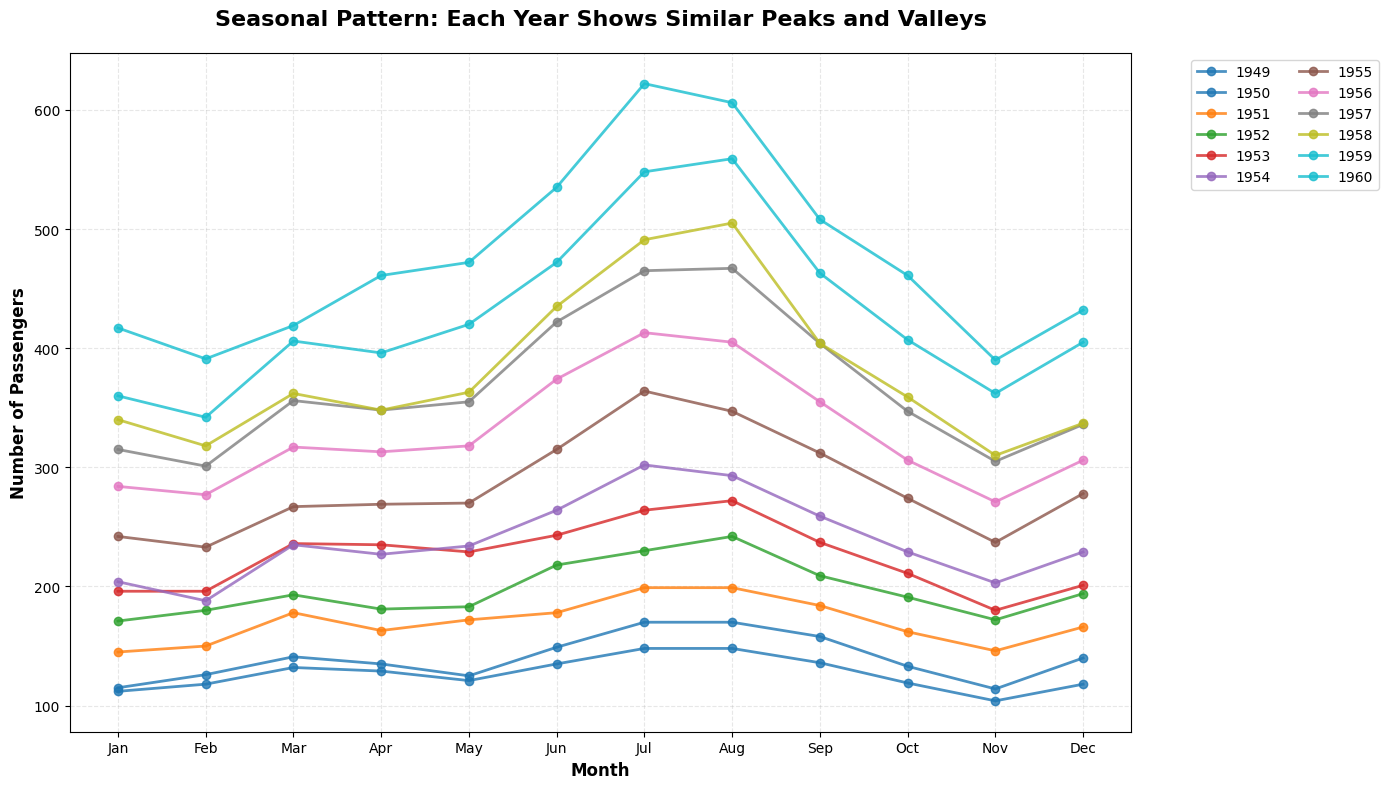


📊 Key Observations:
✅ Each year follows a similar pattern (SEASONALITY)
✅ Peaks occur in summer months (June-August)
✅ Valleys occur in winter months (November-February)
✅ But each year is higher than the previous (TREND)

💡 This confirms we have both trend AND seasonality


In [12]:
# Extract year and month for grouping
data['Year'] = data.index.year
data['MonthNum'] = data.index.month

# Create a plot showing each year as a separate line
plt.figure(figsize=(14, 8))

# Plot each year
years = sorted(data['Year'].unique())
colors = plt.cm.tab10(np.linspace(0, 1, len(years)))

for i, year in enumerate(years):
    year_data = data[data['Year'] == year]
    plt.plot(year_data['MonthNum'], year_data['#Passengers'], 
             marker='o', linewidth=2, markersize=6, 
             label=f'{year}', color=colors[i], alpha=0.8)

plt.title('Seasonal Pattern: Each Year Shows Similar Peaks and Valleys', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Number of Passengers', fontsize=12, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2, fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

print("\n📊 Key Observations:")
print("✅ Each year follows a similar pattern (SEASONALITY)")
print("✅ Peaks occur in summer months (June-August)")
print("✅ Valleys occur in winter months (November-February)")
print("✅ But each year is higher than the previous (TREND)")
print("\n💡 This confirms we have both trend AND seasonality")


### Method 2: Zooming In to See Details

Sometimes you need to zoom in to see patterns more clearly. Let's look at a shorter time period.


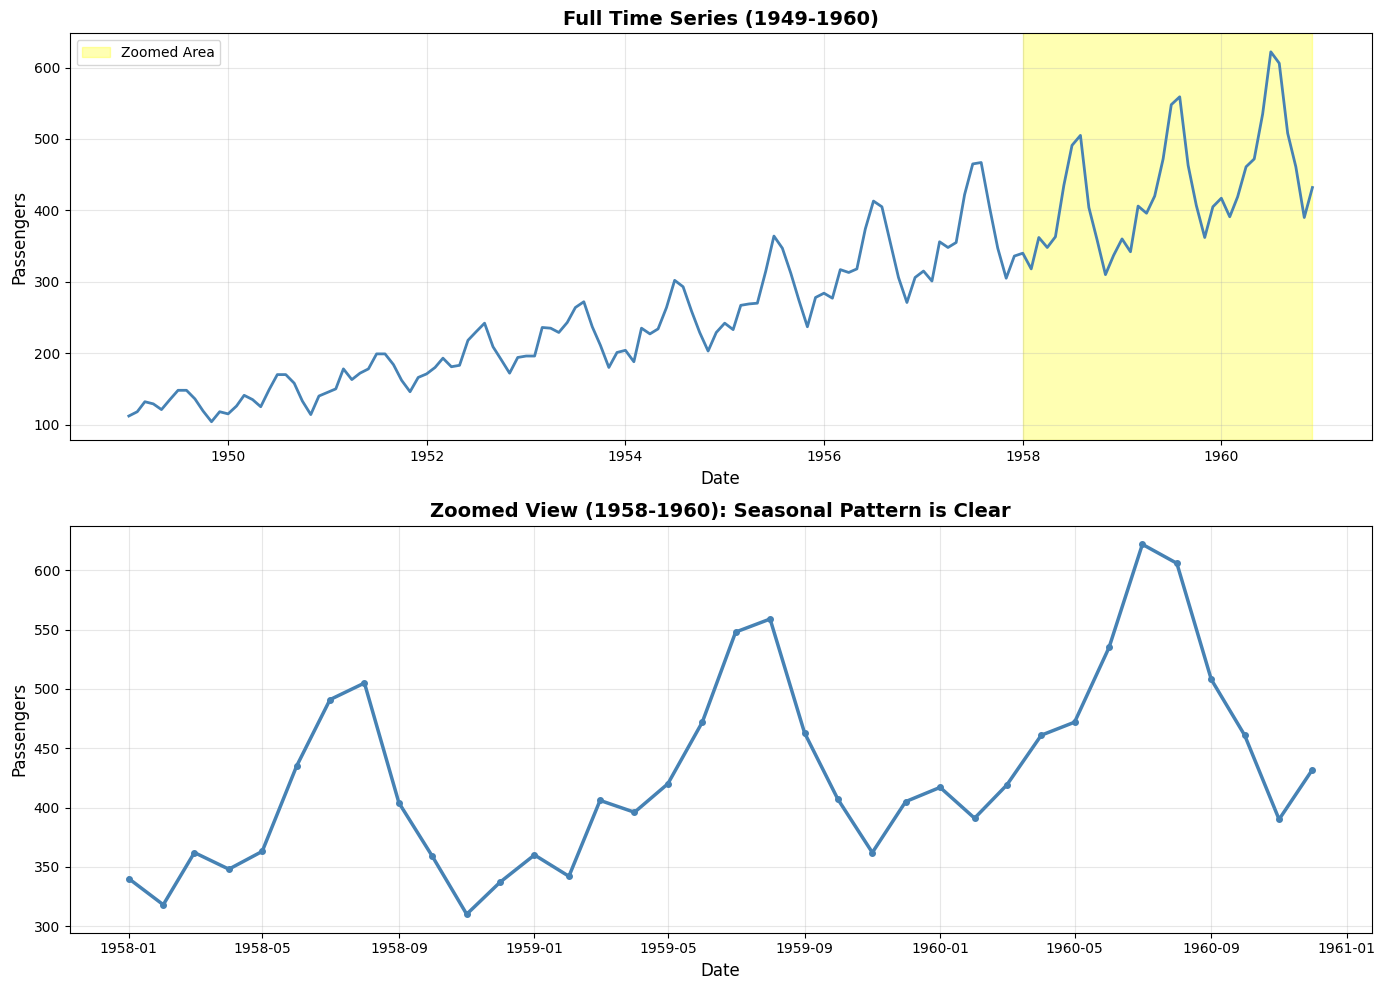


🔍 What's easier to see in the zoomed view?
- The seasonal peaks and valleys are more obvious
- You can see the pattern repeats every 12 months
- The upward trend is still visible even in this short period


In [13]:
# Zoom in on a 2-year period to see seasonal patterns more clearly
zoom_data = data[(data.index >= '1958-01-01') & (data.index <= '1960-12-31')]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Full time series
ax1.plot(data.index, data['#Passengers'], linewidth=2, color='steelblue')
ax1.axvspan(zoom_data.index.min(), zoom_data.index.max(), 
            alpha=0.3, color='yellow', label='Zoomed Area')
ax1.set_title('Full Time Series (1949-1960)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Passengers', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Zoomed view
ax2.plot(zoom_data.index, zoom_data['#Passengers'], 
         linewidth=2.5, color='steelblue', marker='o', markersize=4)
ax2.set_title('Zoomed View (1958-1960): Seasonal Pattern is Clear', 
              fontsize=14, fontweight='bold')
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Passengers', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🔍 What's easier to see in the zoomed view?")
print("- The seasonal peaks and valleys are more obvious")
print("- You can see the pattern repeats every 12 months")
print("- The upward trend is still visible even in this short period")


## Section 4: Comparing Multiple Time Series

Sometimes you want to compare different time series on the same plot. This is useful for:
- Comparing different products
- Comparing actual vs forecasted values
- Comparing different time periods


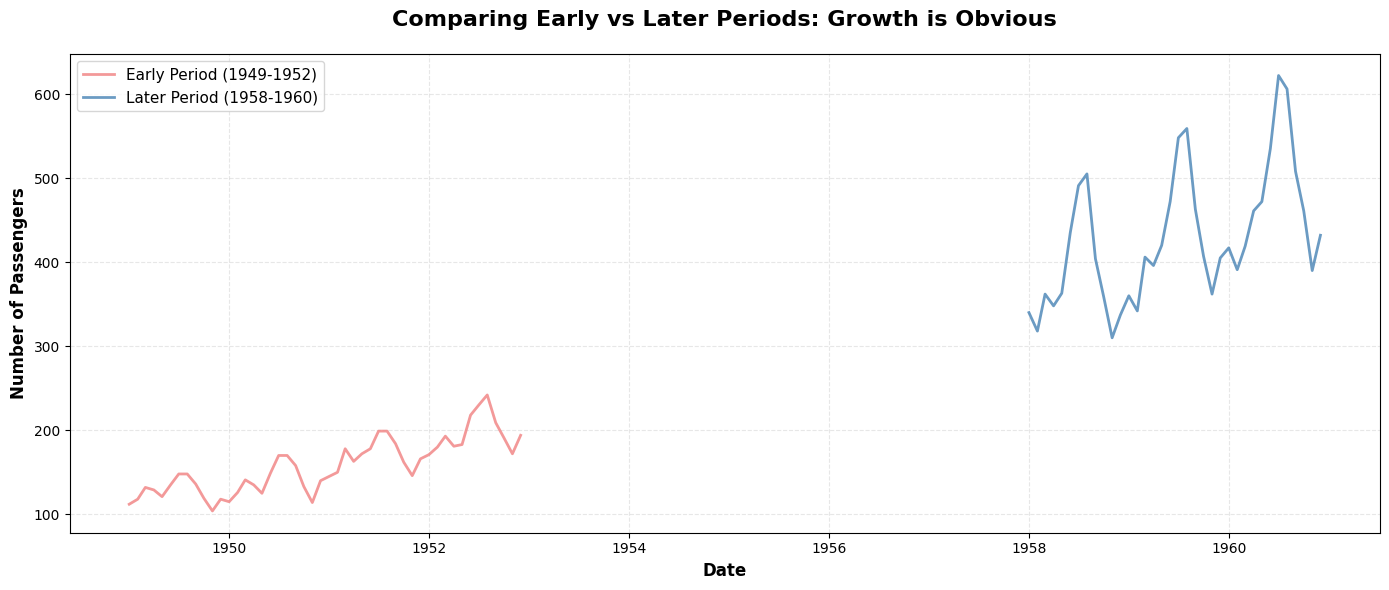


📊 Key Comparison:
✅ Later period is consistently higher (growth trend)
✅ Seasonal patterns are similar but larger (multiplicative)
✅ Both periods show the same seasonal cycle


In [14]:
# Example: Compare early period vs later period
early_period = data[data.index.year <= 1952]
later_period = data[data.index.year >= 1958]

plt.figure(figsize=(14, 6))
plt.plot(early_period.index, early_period['#Passengers'], 
         linewidth=2, color='lightcoral', label='Early Period (1949-1952)', alpha=0.8)
plt.plot(later_period.index, later_period['#Passengers'], 
         linewidth=2, color='steelblue', label='Later Period (1958-1960)', alpha=0.8)
plt.title('Comparing Early vs Later Periods: Growth is Obvious', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Number of Passengers', fontsize=12, fontweight='bold')
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print("\n📊 Key Comparison:")
print("✅ Later period is consistently higher (growth trend)")
print("✅ Seasonal patterns are similar but larger (multiplicative)")
print("✅ Both periods show the same seasonal cycle")


## Section 5: Best Practices for Time Series Visualization

### Design Principles

1. **Clear Labels:** Always label your axes and include units
2. **Descriptive Titles:** Titles should explain what the plot shows
3. **Appropriate Colors:** Use colors that are easy to distinguish
4. **Grid Lines:** Help readers estimate values
5. **Legend:** When showing multiple series, always include a legend
6. **Size Matters:** Make plots large enough to see details

### What to Look For

**When examining a time series plot, ask yourself:**

1. **Trend Questions:**
   - Is the overall direction up, down, or flat?
   - Is the trend consistent or changing?
   - Are there any sudden changes in direction?

2. **Seasonality Questions:**
   - Do I see repeating patterns?
   - How often do they repeat? (Daily, weekly, monthly, yearly?)
   - Are the patterns getting stronger or weaker over time?

3. **Anomaly Questions:**
   - Are there any unusual spikes or drops?
   - Do they have explanations?
   - Should they be removed or investigated?

4. **Noise Questions:**
   - How much random variation is there?
   - Is the noise consistent over time?
   - Is it small compared to trend and seasonality?

**Think About It:** What would you look for if you were analyzing sales data for a retail store?


## Summary: Key Takeaways

This notebook emphasized the critical importance of visualization in time series analysis:

### What We Learned

1. **Visualization is Foundation:** Always plot your data before building models

2. **Trend Identification:** 
   - Use moving averages to smooth out noise
   - Look for overall direction (up, down, flat)
   - Compare different time periods

3. **Seasonality Identification:**
   - Plot each year/period separately to see repeating patterns
   - Look for peaks and valleys at regular intervals
   - Zoom in to see details more clearly

4. **Effective Plotting:**
   - Use clear labels and titles
   - Choose appropriate colors
   - Include grid lines and legends
   - Make plots large enough to see details

5. **Multiple Views:**
   - Full view for overall pattern
   - Zoomed view for details
   - Comparative views for different periods

### Key Insights

- **See before you model:** Visualization guides model selection
- **Patterns are visual:** Trends and seasonality are easier to see than calculate
- **Multiple perspectives:** Different views reveal different insights
- **Communication tool:** Graphs help explain findings to stakeholders

### Why This Matters

Good visualization helps you:
- Choose the right forecasting model
- Understand what's driving your data
- Communicate findings effectively
- Catch errors before they cause problems

### Next Steps

In the next notebook, we'll learn how to use Python tools to automatically decompose time series into trend, seasonality, and noise components. This builds on what we've learned to identify visually!

**Remember:** A picture is worth a thousand numbers. Always visualize first.
